### General libraries being loaded

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# For plotting statistical figures
import seaborn as sns; sns.set()

# For speeding up numpy operations
import cupy as cp

# For faster numpy computation
from numba import jit, cuda

# For Progress Bar
from tqdm.auto import tqdm,trange
tqdm.pandas()

# Vaex Dataframe library
import vaex as vx

# For Pyspark activation
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"

# Pyspark Dataframe
from pyspark import pandas as ps

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Loading Quora Dataset (Training and Testing Data)

In [2]:
import pandas as pd

quora_train_df = pd.read_csv(filepath_or_buffer=r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\train.csv\train.csv").fillna(' ')
quora_test_df = pd.read_csv(filepath_or_buffer=r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\test.csv\test.csv").fillna(' ')

### Displaying Quora Training Dataset

In [3]:
from tabulate import tabulate

print('\033[1m' + 'The Loaded Training Dataset is:' + '\033[0m' + '\n')
print(tabulate(quora_train_df.loc[0:5,:], headers='keys', tablefmt='psql'))
print('\n')

The Loaded Training Dataset is:

+----+----------------------+-----------------------------------------------------------------------------------+----------+
|    | qid                  | question_text                                                                     |   target |
|----+----------------------+-----------------------------------------------------------------------------------+----------|
|  0 | 00002165364db923c7e6 | How did Quebec nationalists see their province as a nation in the 1960s?          |        0 |
|  1 | 000032939017120e6e44 | Do you have an adopted dog, how would you encourage people to adopt and not shop? |        0 |
|  2 | 0000412ca6e4628ce2cf | Why does velocity affect time? Does velocity affect space geometry?               |        0 |
|  3 | 000042bf85aa498cd78e | How did Otto von Guericke used the Magdeburg hemispheres?                         |        0 |
|  4 | 0000455dfa3e01eae3af | Can I convert montra helicon D to a mountain bike by just chan

### Displaying Quora Testing Dataset

In [4]:
print('\033[1m' + 'The Loaded Testing Dataset is:' + '\033[0m' + '\n')
print(tabulate(quora_test_df.loc[10:15,:], headers='keys', tablefmt='psql'))
print('\n')

The Loaded Testing Dataset is:

+----+----------------------+--------------------------------------------------------------------------+
|    | qid                  | question_text                                                            |
|----+----------------------+--------------------------------------------------------------------------|
| 10 | 00015c487b65d0f79cd8 | What are the best ways to save money for software engineer in Bangalore? |
| 11 | 0001880504d9d091c8c8 | What plant can I grow indoors?                                           |
| 12 | 00019b780e31adab8acd | Are military air traffic controllers FAA certified?                      |
| 13 | 0001d5bbc5f7b7a5ae58 | Why my answers not get any upvotes on Quora?                             |
| 14 | 0001f64b6aaf396c4cc4 | Whats a 1788 new hampshire quarter worth?                                |
| 15 | 000227734433360e1aae | What are the best made pocket knives under $200-300?                     |
+----+-----------------

### Loading Libraries for Tokenization of Sentences

In [5]:
import spacy
nlp = spacy.load("en_core_web_trf")

from tqdm.notebook import trange, tqdm

import torchtext
from torchtext.data import get_tokenizer

import torch

tokenizer = get_tokenizer('spacy', language='en_core_web_trf')

### Tokenizing Training and Testing Dataset using Spacy

In [6]:
# Adding Spacy sentence column in Training data
quora_train_list = [0]*((quora_train_df.shape)[0]) 
quora_train_df.insert(loc=2,column='question_text_nlp',value=quora_train_list) 
quora_train_df = quora_train_df.astype('object')

quora_nlp_pipe_docs = quora_train_df['question_text'].to_list()
quora_nlp_length = len(quora_nlp_pipe_docs)

i=0
for quora_nlp_pipe_doc in tqdm(quora_nlp_pipe_docs,total=quora_nlp_length):
    quora_nlp_pipe_tokens = tokenizer(quora_nlp_pipe_doc)
    quora_train_df.loc[i]['question_text_nlp'] = quora_nlp_pipe_tokens
    i=i+1
    
print('\033[1m' + 'The Loaded Training Dataset (with Spacy) is:' + '\033[0m' + '\n')
print(quora_train_df['question_text_nlp'])
print('\n')

# Adding Spacy sentence column in Testing data
quora_test_list = [0]*((quora_test_df.shape)[0]) 
quora_test_df.insert(loc=2,column='question_text_nlp',value=quora_test_list) 
quora_test_df = quora_test_df.astype('object')

quora_nlp_pipe_docs = quora_test_df['question_text'].to_list()
quora_nlp_length = len(quora_nlp_pipe_docs)

i=0
for quora_nlp_pipe_doc in tqdm(quora_nlp_pipe_docs,total=quora_nlp_length):
    quora_nlp_pipe_tokens = tokenizer(quora_nlp_pipe_doc)
    quora_test_df.loc[i]['question_text_nlp'] = quora_nlp_pipe_tokens
    i=i+1
    
print('\033[1m' + 'The Loaded Testing Dataset (with Spacy) is:' + '\033[0m' + '\n')
print(quora_test_df['question_text_nlp'])
print('\n')

  0%|          | 0/1306122 [00:00<?, ?it/s]

The Loaded Training Dataset (with Spacy) is:

0          [How, did, Quebec, nationalists, see, their, p...
1          [Do, you, have, an, adopted, dog, ,, how, woul...
2          [Why, does, velocity, affect, time, ?, Does, v...
3          [How, did, Otto, von, Guericke, used, the, Mag...
4          [Can, I, convert, montra, helicon, D, to, a, m...
                                 ...                        
1306117    [What, other, technical, skills, do, you, need...
1306118    [Does, MS, in, ECE, have, good, job, prospects...
1306119                     [Is, foam, insulation, toxic, ?]
1306120    [How, can, one, start, a, research, project, b...
1306121    [Who, wins, in, a, battle, between, a, Wolveri...
Name: question_text_nlp, Length: 1306122, dtype: object




  0%|          | 0/375806 [00:00<?, ?it/s]

The Loaded Testing Dataset (with Spacy) is:

0         [Why, do, so, many, women, become, so, rude, a...
1         [When, should, I, apply, for, RV, college, of,...
2         [What, is, it, really, like, to, be, a, nurse,...
3                              [Who, are, entrepreneurs, ?]
4         [Is, education, really, making, good, people, ...
                                ...                        
375801    [How, many, countries, listed, in, gold, impor...
375802    [Is, there, an, alternative, to, dresses, on, ...
375803    [Where, I, can, find, best, friendship, quotes...
375804    [What, are, the, causes, of, refraction, of, l...
375805    [Climate, change, is, a, worrying, topic, ., H...
Name: question_text_nlp, Length: 375806, dtype: object




### Calculating the Frequency of Words in all Sentences

In [7]:
# Loading counter for word frequency
from collections import Counter

# For flattening the list 
import itertools

# Training Data
quora_train_list = quora_train_df['question_text_nlp'].to_list()
quora_train_list_flat = list(itertools.chain(*quora_train_list))

quora_train_freq_counter = Counter(quora_train_list_flat)
quora_train_freq_df = pd.DataFrame.from_dict(quora_train_freq_counter, orient='index').reset_index()
quora_train_freq_df.rename(columns={'index':'Word',0:'Frequency'},inplace=True)

print('\033[1m' + 'The Frequency of Words in Training Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_train_freq_df)
print('\n')

# Testing data
quora_test_list = quora_test_df['question_text_nlp'].to_list()
quora_test_list_flat = list(itertools.chain(*quora_test_list))

quora_test_freq_counter = Counter(quora_test_list_flat)
quora_test_freq_df = pd.DataFrame.from_dict(quora_test_freq_counter, orient='index').reset_index()
quora_test_freq_df.rename(columns={'index':'Word',0:'Frequency'},inplace=True)

print('\033[1m' + 'The Frequency of Words in Testing Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_test_freq_df)
print('\n')

The Frequency of Words in Training Dataset (Tokenized with Spacy) is:

                Word  Frequency
0                How     263248
1                did      37932
2             Quebec        160
3       nationalists        131
4                see       9561
...              ...        ...
260164          60+%          1
260165        Westen          1
260166    statechart          1
260167      BrainPOP          1
260168   filteration          2

[260169 rows x 2 columns]


The Frequency of Words in Testing Dataset (Tokenized with Spacy) is:

                 Word  Frequency
0                 Why      41707
1                  do      65861
2                  so      10801
3                many       6844
4               women       3673
...               ...        ...
128494         jingle          1
128495           6740          1
128496  consequence(s          1
128497        lineral          1
128498          indua          1

[128499 rows x 2 columns]




### Word Cloud for Training Data

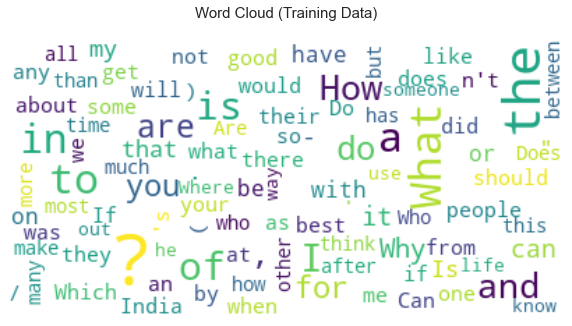

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

# Training word's WordCloud 
quora_train_freq_df = quora_train_freq_df.sort_values(by=['Frequency'],ascending=False) 
quora_train_freq_df_dd = pd.DataFrame(data=list(quora_train_freq_df['Frequency']),index=list(quora_train_freq_df['Word'])) 
quora_train_freq_dict = (quora_train_freq_df_dd.to_dict())[0]

word_cloud = WordCloud(max_font_size=50, max_words=100, background_color="white") 
word_cloud.generate_from_frequencies(quora_train_freq_dict) 
plt.figure(figsize = (10,10)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.axis("off") 
plt.title("Word Cloud (Training Data)\n",fontsize = 15)  
plt.show() 

### Word Cloud for Testing Data

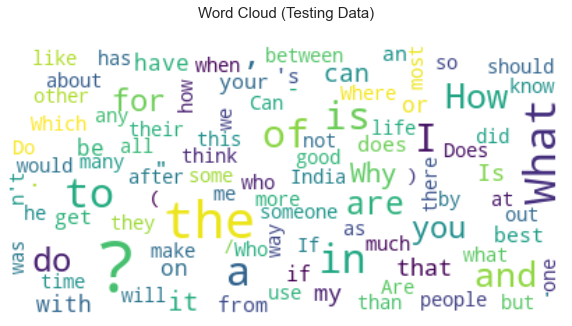

In [9]:
# Testing word's WordCloud 
quora_test_freq_df = quora_test_freq_df.sort_values(by=['Frequency'],ascending=False) 
quora_test_freq_df_dd = pd.DataFrame(data=list(quora_test_freq_df['Frequency']),index=list(quora_test_freq_df['Word'])) 
quora_test_freq_dict = (quora_test_freq_df_dd.to_dict())[0]

word_cloud = WordCloud(max_font_size=50, max_words=100, background_color="white") 
word_cloud.generate_from_frequencies(quora_test_freq_dict) 
plt.figure(figsize = (10,10)) 
plt.imshow(word_cloud, interpolation="bilinear") 
plt.axis("off") 
plt.title("Word Cloud (Testing Data)\n",fontsize = 15)
plt.show() 

### Concatenating quora_train_dict_idf and quora_train_dict_idf to create Global Dictionary with word as key and IDF as values

In [10]:
# Adding column to distinguish between Training and Testing Data

# Training Data
quora_train_freq_df.insert(loc=2,value=(quora_train_freq_df.shape[0]*[0]),column='Is_Testing_Data')

# Testing Data
quora_test_freq_df.insert(loc=2,value=(quora_test_freq_df.shape[0]*[1]),column='Is_Testing_Data')

In [11]:
quora_tt_freq_df =  pd.concat([quora_train_freq_df,quora_test_freq_df])
quora_tt_freq_df = quora_tt_freq_df.reset_index(drop=True)

In [12]:
# Training Data
quora_train_df.insert(loc=2,value=(quora_train_df.shape[0]*[0]),column='Is_Testing_Data')

# Testing Data
quora_test_df.insert(loc=2,value=(quora_test_df.shape[0]*[1]),column='Is_Testing_Data')

In [13]:
quora_tt_df =  pd.concat([quora_train_df,quora_test_df])
quora_tt_df = quora_tt_df.reset_index(drop=True)
quora_tt_df = quora_tt_df.fillna(-1)

### Unique Word Calculation for IDF (Function)

In [14]:
def each_row_word_count(question_text_nlp):
    row_word_count = dict(Counter(question_text_nlp))
    return [row_word_count]

In [15]:
def each_row_unique_word(row_word_count):
    row_unique_word = list(row_word_count[0].keys())
    return row_unique_word

### IDF Calculation of Training Dataset (Function)

In [16]:
import math

row_train_N = quora_train_df.shape[0]

def each_train_row_IDF(row_DF):
    row_IDF = math.log10(row_train_N/row_DF)
    return row_IDF

### IDF Calculation of Testing Dataset (Function)

In [17]:
row_test_N = quora_test_df.shape[0]

def each_test_row_IDF(row_DF):
    row_IDF = math.log10(row_test_N/row_DF)
    return row_IDF

### IDF Calculation of Combined Training and Testing Dataset (Function)

In [18]:
row_tt_N = quora_tt_df.shape[0]

def each_tt_row_IDF(row_DF):
    row_IDF = math.log10(row_tt_N/row_DF)
    return row_IDF

### Calculation of IDF for Training Dataset

In [19]:
from tqdm.auto import tqdm
tqdm.pandas()

quora_train_list = [0]*((quora_train_df.shape)[0])
quora_train_df.insert(loc=3,column='Word_Count',value=quora_train_list)
quora_train_df = quora_train_df.astype('object')

quora_train_df['Word_Count'] = quora_train_df['question_text_nlp'].apply(each_row_word_count)
quora_train_df['Word_Count'] = quora_train_df['Word_Count'].apply(each_row_unique_word)

quora_train_freq_list = quora_train_df['Word_Count'].to_list()
quora_train_freq_list_flat = list(itertools.chain(*quora_train_freq_list))

quora_train_freq_dict_flat = dict(Counter(quora_train_freq_list_flat))
del quora_train_freq_df

quora_train_freq_df = pd.DataFrame(data=list(quora_train_freq_dict_flat.keys()),columns=['Word'])
quora_train_freq_df.insert(loc=1,value=list(quora_train_freq_dict_flat.values()),column='Document Frequency')
quora_train_freq_df = quora_train_freq_df.astype('object')

# Calculating IDF for Training Data
quora_train_freq_list = [0]*((quora_train_freq_df.shape)[0]) 
quora_train_freq_df.insert(loc=2,column='IDF',value=quora_train_freq_list)
quora_train_freq_df = quora_train_freq_df.astype('object')

quora_train_freq_df['IDF'] = quora_train_freq_df['Document Frequency'].progress_apply(each_train_row_IDF)

print('\033[1m' + 'The Frequency of Words with Inverse Document Frequency (IDF) in Training Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_train_freq_df)
print('\n')

  0%|          | 0/260169 [00:00<?, ?it/s]

The Frequency of Words with Inverse Document Frequency (IDF) in Training Dataset (Tokenized with Spacy) is:

                Word Document Frequency       IDF
0                How             261402  0.698675
1                did              36603  1.552467
2             Quebec                152  3.934140
3       nationalists                127  4.012180
4                see               9259  2.149420
...              ...                ...       ...
260164          60+%                  1  6.115984
260165        Westen                  1  6.115984
260166    statechart                  1  6.115984
260167      BrainPOP                  1  6.115984
260168   filteration                  1  6.115984

[260169 rows x 3 columns]




### Calculation of IDF for Testing Dataset

In [20]:
quora_test_list = [0]*((quora_test_df.shape)[0])
quora_test_df.insert(loc=3,column='Word_Count',value=quora_test_list)
quora_test_df = quora_test_df.astype('object')

quora_test_df['Word_Count'] = quora_test_df['question_text_nlp'].apply(each_row_word_count)
quora_test_df['Word_Count'] = quora_test_df['Word_Count'].apply(each_row_unique_word)

quora_test_freq_list = quora_test_df['Word_Count'].to_list()
quora_test_freq_list_flat = list(itertools.chain(*quora_test_freq_list))

quora_test_freq_dict_flat = dict(Counter(quora_test_freq_list_flat))
del quora_test_freq_df

quora_test_freq_df = pd.DataFrame(data=list(quora_test_freq_dict_flat.keys()),columns=['Word'])
quora_test_freq_df.insert(loc=1,value=list(quora_test_freq_dict_flat.values()),column='Document Frequency')
quora_test_freq_df = quora_test_freq_df.astype('object')

# Calculating IDF for Testing Data
quora_test_freq_list = [0]*((quora_test_freq_df.shape)[0]) 
quora_test_freq_df.insert(loc=2,column='IDF',value=quora_test_freq_list)
quora_test_freq_df = quora_test_freq_df.astype('object')

quora_test_freq_df['IDF'] = quora_test_freq_df['Document Frequency'].progress_apply(each_test_row_IDF)

print('\033[1m' + 'The Frequency of Words with Inverse Document Frequency (IDF) in Testing Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_test_freq_df)
print('\n')

  0%|          | 0/128499 [00:00<?, ?it/s]

The Frequency of Words with Inverse Document Frequency (IDF) in Testing Dataset (Tokenized with Spacy) is:

                 Word Document Frequency       IDF
0                 Why              41016  0.962010
1                  do              60920  0.790204
2                  so              10369  1.559227
3                many               6711  1.748176
4               women               3372  2.047076
...               ...                ...       ...
128494         jingle                  1  5.574964
128495           6740                  1  5.574964
128496  consequence(s                  1  5.574964
128497        lineral                  1  5.574964
128498          indua                  1  5.574964

[128499 rows x 3 columns]




### Calculation of IDF for Combined Training and Testing Dataset

In [21]:
quora_tt_list = [0]*((quora_tt_df.shape)[0])
quora_tt_df.insert(loc=3,column='Word_Count',value=quora_tt_list)
quora_tt_df = quora_tt_df.astype('object')

quora_tt_df['Word_Count'] = quora_tt_df['question_text_nlp'].apply(each_row_word_count)
quora_tt_df['Word_Count'] = quora_tt_df['Word_Count'].apply(each_row_unique_word)

quora_tt_freq_list = quora_tt_df['Word_Count'].to_list()
quora_tt_freq_list_flat = list(itertools.chain(*quora_tt_freq_list))

quora_tt_freq_dict_flat = dict(Counter(quora_tt_freq_list_flat))
del quora_tt_freq_df

quora_tt_freq_df = pd.DataFrame(data=list(quora_tt_freq_dict_flat.keys()),columns=['Word'])
quora_tt_freq_df.insert(loc=1,value=list(quora_tt_freq_dict_flat.values()),column='Document Frequency')
quora_tt_freq_df = quora_tt_freq_df.astype('object')

# Calculating IDF for Combined Training and Testing Data
quora_tt_freq_list = [0]*((quora_tt_freq_df.shape)[0]) 
quora_tt_freq_df.insert(loc=2,column='IDF',value=quora_tt_freq_list)
quora_tt_freq_df = quora_tt_freq_df.astype('object')

quora_tt_freq_df['IDF'] = quora_tt_freq_df['Document Frequency'].progress_apply(each_tt_row_IDF)

print('\033[1m' + 'The Frequency of Words with Inverse Document Frequency (IDF) in Combined Training and Testing Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_tt_freq_df)
print('\n')

  0%|          | 0/301079 [00:00<?, ?it/s]

The Frequency of Words with Inverse Document Frequency (IDF) in Combined Training and Testing Dataset (Tokenized with Spacy) is:

                Word Document Frequency       IDF
0                How             335758  0.699781
1                did              47161  1.552224
2             Quebec                184  3.960990
3       nationalists                169  3.997921
4                see              11918  2.149604
...              ...                ...       ...
301074           नीच                  1  6.225807
301075        टुच्चा                  1  6.225807
301076        Miklos                  1  6.225807
301077          6740                  1  6.225807
301078         indua                  1  6.225807

[301079 rows x 3 columns]




### Calculating the Maximum length of a Sentence in either Training or Testing Data for Token Encoding (Giving Unique ID to each word)

In [22]:
max_sentence_length_train = max(quora_train_df['question_text_nlp'].progress_apply(len).to_list())
max_sentence_length_test = max(quora_test_df['question_text_nlp'].progress_apply(len).to_list())

if (max_sentence_length_train >= max_sentence_length_test):
    max_sentence_length_quora = max_sentence_length_train
elif (max_sentence_length_train < max_sentence_length_test):
    max_sentence_length_quora = max_sentence_length_test
else:
    pass

  0%|          | 0/1306122 [00:00<?, ?it/s]

  0%|          | 0/375806 [00:00<?, ?it/s]

### Creating a Dictionary with word as key and IDF as values

In [23]:
# Dictionary with {word:IDF} format for Training Data
quora_train_dict_idf = dict(quora_train_freq_df.loc[:,['Word','IDF']].values)

# Dictionary with {word:IDF} format for Testing Data
quora_test_dict_idf = dict(quora_test_freq_df.loc[:,['Word','IDF']].values)

# Dictionary with {word:IDF} format for Combined Training and Testing Data
quora_tt_dict_idf = dict(quora_tt_freq_df.loc[:,['Word','IDF']].values)

### Giving Unique ID to Each Word in Training and Testing Data (Function)

In [24]:
def each_word_id_grant(nor_num):
    return nor_num+1

### Giving each word Unique ID in Training Data

In [25]:
# Inserting row in Training Data and giving each word Unique ID
quora_train_freq_df.insert(loc=0,value=list(quora_train_freq_df.index),column='word_id')
quora_train_freq_df['word_id'] = quora_train_freq_df['word_id'].progress_apply(each_word_id_grant)

  0%|          | 0/260169 [00:00<?, ?it/s]

### Giving each word Unique ID in Testing Data

In [26]:
# Inserting row in Testing Data and giving each word Unique ID
quora_test_freq_df.insert(loc=0,value=list(quora_test_freq_df.index),column='word_id')
quora_test_freq_df['word_id'] = quora_test_freq_df['word_id'].progress_apply(each_word_id_grant)
quora_test_freq_df['word_id'] = quora_test_freq_df['word_id']+(quora_train_freq_df.loc[quora_train_freq_df.shape[0]-1,'word_id'])

  0%|          | 0/128499 [00:00<?, ?it/s]

### Giving each word Unique ID in Combined Training and Testing Data

In [27]:
# Inserting row in Combined Training and Testing Data and giving each word Unique ID
quora_tt_freq_df.insert(loc=0,value=list(quora_tt_freq_df.index),column='word_id')
quora_tt_freq_df['word_id'] = quora_tt_freq_df['word_id'].progress_apply(each_word_id_grant)

  0%|          | 0/301079 [00:00<?, ?it/s]

### Creating a Dictionary with key as Word and Value as Unique Word ID

In [28]:
# Creating a Dictionary with {word:word_id} format in Training Data
quora_train_word_dict = dict(quora_train_freq_df.loc[:,['Word','word_id']].values)

# Creating a Dictionary with {word:word_id} format in Testing Data
quora_test_word_dict = dict(quora_test_freq_df.loc[:,['Word','word_id']].values)

# Creating a Dictionary with {word:word_id} format in Combined Training and Testing Data
quora_tt_word_dict = dict(quora_tt_freq_df.loc[:,['Word','word_id']].values)

### Replacing Tokens of each sentence with their Unique Word ID's in Training Data (Function)

In [29]:
def row_train_encoding_words(row_keys):
    train_encoding_words_list = [quora_train_word_dict.get(row_key) for row_key in row_keys]
    return train_encoding_words_list

### Replacing Tokens of each sentence with their Unique Word ID's in Testing Data (Function)

In [30]:
def row_test_encoding_words(row_keys):
    test_encoding_words_list = [quora_test_word_dict.get(row_key) for row_key in row_keys]
    return test_encoding_words_list

### Replacing Tokens of each sentence with their Unique Word ID's in Combined Training and Testing Data (Function)

In [31]:
def row_tt_encoding_words(row_keys):
    tt_encoding_words_list = [quora_tt_word_dict.get(row_key) for row_key in row_keys]
    return tt_encoding_words_list

### Replacing Tokens of each sentence with their Unique Word ID's in DataFrame in Training Data

In [32]:
quora_train_list = [0]*((quora_train_df.shape)[0])
quora_train_df.insert(loc=3,column='question_text_encode',value=quora_train_list)
quora_train_df = quora_train_df.astype('object')

quora_train_df['question_text_encode'] = quora_train_df['question_text_nlp'].progress_apply(row_train_encoding_words)

print('\033[1m' + 'The Encoded Word Tokens in Training Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_train_df['question_text_encode'])
print('\n')

  0%|          | 0/1306122 [00:00<?, ?it/s]

The Encoded Word Tokens in Training Dataset (Tokenized with Spacy) is:

0            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1          [15, 16, 17, 18, 19, 20, 21, 22, 23, 16, 24, 2...
2           [31, 32, 33, 34, 35, 14, 36, 33, 34, 37, 38, 14]
3                     [1, 2, 39, 40, 41, 42, 12, 43, 44, 14]
4          [45, 46, 47, 48, 49, 50, 26, 9, 51, 52, 53, 54...
                                 ...                        
1306117    [128, 804, 10259, 5574, 75, 16, 369, 8, 9, 423...
1306118    [36, 2764, 11, 4856, 17, 174, 1438, 3200, 11, ...
1306119                         [57, 12591, 27620, 5732, 14]
1306120    [1, 129, 404, 735, 9, 1858, 428, 603, 519, 123...
1306121    [679, 2557, 11, 9, 3815, 313, 9, 28466, 28, 9,...
Name: question_text_encode, Length: 1306122, dtype: object




### Replacing Tokens of each sentence with their Unique Word ID's in DataFrame in Testing Data

In [33]:
quora_test_list = [0]*((quora_test_df.shape)[0])
quora_test_df.insert(loc=3,column='question_text_encode',value=quora_test_list)
quora_test_df = quora_test_df.astype('object')

quora_test_df['question_text_encode'] = quora_test_df['question_text_nlp'].progress_apply(row_test_encoding_words)

print('\033[1m' + 'The Encoded Word Tokens in Testing Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_test_df['question_text_encode'])
print('\n')

  0%|          | 0/375806 [00:00<?, ?it/s]

The Encoded Word Tokens in Testing Dataset (Tokenized with Spacy) is:

0         [260170, 260171, 260172, 260173, 260174, 26017...
1         [260190, 260191, 260192, 260193, 260194, 26019...
2         [260209, 260210, 260211, 260212, 260213, 26020...
3                          [260217, 260218, 260219, 260189]
4         [260220, 260221, 260212, 260222, 260223, 26022...
                                ...                        
375801    [260226, 260173, 262619, 267097, 260233, 27123...
375802    [260220, 260609, 260658, 263722, 260207, 27588...
375803    [260480, 260192, 260238, 260625, 260264, 26363...
375804    [260209, 260218, 260201, 264803, 260186, 28838...
375805    [285136, 261770, 260210, 260183, 274188, 26444...
Name: question_text_encode, Length: 375806, dtype: object




### Replacing Tokens of each sentence with their Unique Word ID's in DataFrame in Combined Training and Testing Data

In [34]:
quora_tt_list = [0]*((quora_tt_df.shape)[0])
quora_tt_df.insert(loc=3,column='question_text_encode',value=quora_tt_list)
quora_tt_df = quora_tt_df.astype('object')

quora_tt_df['question_text_encode'] = quora_tt_df['question_text_nlp'].progress_apply(row_tt_encoding_words)

print('\033[1m' + 'The Encoded Word Tokens in Combined Training and Testing Dataset (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_tt_df['question_text_encode'])
print('\n')

  0%|          | 0/1681928 [00:00<?, ?it/s]

The Encoded Word Tokens in Combined Training and Testing Dataset (Tokenized with Spacy) is:

0            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1          [15, 16, 17, 18, 19, 20, 21, 22, 23, 16, 24, 2...
2           [31, 32, 33, 34, 35, 14, 36, 33, 34, 37, 38, 14]
3                     [1, 2, 39, 40, 41, 42, 12, 43, 44, 14]
4          [45, 46, 47, 48, 49, 50, 26, 9, 51, 52, 53, 54...
                                 ...                        
1681923    [1, 196, 625, 967, 11, 11875, 5900, 11, 301079...
1681924    [57, 91, 18, 1863, 26, 4363, 519, 10081, 10317...
1681925    [362, 46, 129, 173, 605, 4747, 1574, 11, 2789,...
1681926        [128, 88, 12, 1982, 182, 14134, 182, 276, 14]
1681927    [53029, 127, 97, 9, 14959, 5121, 90, 1, 471, 3...
Name: question_text_encode, Length: 1681928, dtype: object




### Replacing DataFrame column that contains sentence with Unique Word ID, with padded sentence with Unique Word ID (Function)

In [35]:
from tqdm.auto import tqdm,trange
tqdm.pandas()

def quora_column_replace(quora_sequences_list,quora_sequences_df):
    for i in trange(len(quora_sequences_list)):
        quora_sequences_df.loc[i]['question_text_encode'] = quora_sequences_list[i]
    return quora_sequences_df

### Replacing DataFrame column that contains sentence with Unique Word ID, with padded sentence with Unique Word ID for Training Data

In [36]:
from keras_preprocessing.sequence import pad_sequences

quora_train_sequences = quora_train_df['question_text_encode'].to_list()
quora_test_sequences = quora_test_df['question_text_encode'].to_list()
quora_tt_sequences = quora_tt_df['question_text_encode'].to_list()

quora_train_sequences = pad_sequences(quora_train_sequences, maxlen=max_sentence_length_quora, padding='post')
quora_test_sequences = pad_sequences(quora_test_sequences, maxlen=max_sentence_length_quora, padding='post')
quora_tt_sequences = pad_sequences(quora_tt_sequences, maxlen=max_sentence_length_quora, padding='post')

quora_train_df = quora_column_replace(quora_train_sequences,quora_train_df)

print('\033[1m' + 'The Encoded Word Tokens in Training Dataset with Padding (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_train_df['question_text_encode'])
print('\n')

  0%|          | 0/1306122 [00:00<?, ?it/s]

The Encoded Word Tokens in Training Dataset with Padding (Tokenized with Spacy) is:

0          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
1          [15, 16, 17, 18, 19, 20, 21, 22, 23, 16, 24, 2...
2          [31, 32, 33, 34, 35, 14, 36, 33, 34, 37, 38, 1...
3          [1, 2, 39, 40, 41, 42, 12, 43, 44, 14, 0, 0, 0...
4          [45, 46, 47, 48, 49, 50, 26, 9, 51, 52, 53, 54...
                                 ...                        
1306117    [128, 804, 10259, 5574, 75, 16, 369, 8, 9, 423...
1306118    [36, 2764, 11, 4856, 17, 174, 1438, 3200, 11, ...
1306119    [57, 12591, 27620, 5732, 14, 0, 0, 0, 0, 0, 0,...
1306120    [1, 129, 404, 735, 9, 1858, 428, 603, 519, 123...
1306121    [679, 2557, 11, 9, 3815, 313, 9, 28466, 28, 9,...
Name: question_text_encode, Length: 1306122, dtype: object




### Replacing DataFrame column that contains sentence with Unique Word ID, with padded sentence with Unique Word ID for Testing Data

In [37]:
quora_test_df = quora_column_replace(quora_test_sequences,quora_test_df)

print('\033[1m' + 'The Encoded Word Tokens in Testing Dataset with Padding (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_test_df['question_text_encode'])
print('\n')

  0%|          | 0/375806 [00:00<?, ?it/s]

The Encoded Word Tokens in Testing Dataset with Padding (Tokenized with Spacy) is:

0         [260170, 260171, 260172, 260173, 260174, 26017...
1         [260190, 260191, 260192, 260193, 260194, 26019...
2         [260209, 260210, 260211, 260212, 260213, 26020...
3         [260217, 260218, 260219, 260189, 0, 0, 0, 0, 0...
4         [260220, 260221, 260212, 260222, 260223, 26022...
                                ...                        
375801    [260226, 260173, 262619, 267097, 260233, 27123...
375802    [260220, 260609, 260658, 263722, 260207, 27588...
375803    [260480, 260192, 260238, 260625, 260264, 26363...
375804    [260209, 260218, 260201, 264803, 260186, 28838...
375805    [285136, 261770, 260210, 260183, 274188, 26444...
Name: question_text_encode, Length: 375806, dtype: object




### Replacing DataFrame column that contains sentence with Unique Word ID, with padded sentence with Unique Word ID for Combined Training and Testing Data

In [38]:
quora_tt_df = quora_column_replace(quora_tt_sequences,quora_tt_df)

print('\033[1m' + 'The Encoded Word Tokens in Combined Training and Testing Dataset with Padding (Tokenized with Spacy) is:' + '\033[0m' + '\n')
print(quora_tt_df['question_text_encode'])
print('\n')

  0%|          | 0/1681928 [00:00<?, ?it/s]

The Encoded Word Tokens in Combined Training and Testing Dataset with Padding (Tokenized with Spacy) is:

0          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
1          [15, 16, 17, 18, 19, 20, 21, 22, 23, 16, 24, 2...
2          [31, 32, 33, 34, 35, 14, 36, 33, 34, 37, 38, 1...
3          [1, 2, 39, 40, 41, 42, 12, 43, 44, 14, 0, 0, 0...
4          [45, 46, 47, 48, 49, 50, 26, 9, 51, 52, 53, 54...
                                 ...                        
1681923    [1, 196, 625, 967, 11, 11875, 5900, 11, 301079...
1681924    [57, 91, 18, 1863, 26, 4363, 519, 10081, 10317...
1681925    [362, 46, 129, 173, 605, 4747, 1574, 11, 2789,...
1681926    [128, 88, 12, 1982, 182, 14134, 182, 276, 14, ...
1681927    [53029, 127, 97, 9, 14959, 5121, 90, 1, 471, 3...
Name: question_text_encode, Length: 1681928, dtype: object




### Saving Training, Testing along with Combined Training and Testing Data For Models

In [39]:
quora_train_df.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train\quora_train_df.pkl")
quora_test_df.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Test\quora_test_df.pkl")
quora_tt_df.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train and Test\quora_tt_df.pkl")

quora_train_freq_df.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train\quora_train_freq_df.pkl")
quora_test_freq_df.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Test\quora_test_freq_df.pkl")
quora_tt_freq_df.to_pickle(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train and Test\quora_tt_freq_df.pkl")

# load pickle module
import pickle

f = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train\quora_train_dict_idf.pkl","wb")
f1 = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Test\quora_test_dict_idf.pkl","wb")
f2 = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train and Test\quora_tt_dict_idf.pkl","wb")

pickle.dump(quora_train_dict_idf,f)
pickle.dump(quora_test_dict_idf,f1)
pickle.dump(quora_tt_dict_idf,f2)

f.close()
f1.close()
f2.close()

f = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train\quora_train_word_dict.pkl","wb")
f1 = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Test\quora_test_word_dict.pkl","wb")
f2 = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train and Test\quora_tt_word_dict.pkl","wb")

pickle.dump(quora_train_word_dict,f)
pickle.dump(quora_test_word_dict,f1)
pickle.dump(quora_tt_word_dict,f2)

f.close()
f1.close()
f2.close()

np.save(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\Data\Train and Test\max_sentence_length_quora.npy",max_sentence_length_quora)

### Word Embeddings being loaded (glove.840B.300d)

In [40]:
def load_glove_300d_model(File = None):
    print("Loading Glove Model with 300 Dimension")
    glove_300d_model = {}
    with open(file=File, mode='rt', encoding="utf8") as full_file:
        for file_line in tqdm(full_file,total=2196017):
            split_line = file_line.split(sep=" ")
            word_glove = split_line[0]
            embedding_glove = np.array(split_line[1:], dtype=np.float64)
            glove_300d_model[word_glove] = embedding_glove
    print(f"{len(glove_300d_model)} words loaded!")
    return glove_300d_model

In [41]:
glove_300d_model = load_glove_300d_model(File = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\glove.840B.300d\glove.840B.300d.txt")

Loading Glove Model with 300 Dimension


  0%|          | 0/2196017 [00:00<?, ?it/s]

2196016 words loaded!


### Creating Word Embedding Matrix for Glove Model

In [42]:
# Training Data Embedding Matrix
glove_embedding_matrix_train = np.zeros((quora_train_freq_df.shape[0]+1,300),np.float64)

In [43]:
for embed_keys in tqdm(quora_train_word_dict):
    embed_flag = glove_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        glove_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
    else:
        glove_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = glove_300d_model.get(embed_keys)

  0%|          | 0/260169 [00:00<?, ?it/s]

In [44]:
# Testing Data Embedding Matrix
glove_embedding_matrix_test = np.zeros((quora_test_freq_df.shape[0]+1,300),np.float64)
embed_keys_normalizer = (quora_train_freq_df.loc[quora_train_freq_df.shape[0]-1,'word_id'])

In [45]:
for embed_keys in tqdm(quora_test_word_dict):
    embed_flag = glove_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        glove_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = np.asarray(300*[0],dtype=np.float64)
    else:
        glove_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = glove_300d_model.get(embed_keys)

  0%|          | 0/128499 [00:00<?, ?it/s]

In [46]:
glove_embedding_matrix = np.append(glove_embedding_matrix_train,glove_embedding_matrix_test,axis=0)

In [47]:
# Combined Training and Testing Data Embedding Matrix
glove_embedding_matrix_tt = np.zeros((quora_tt_freq_df.shape[0]+1,300),np.float64)
glove_embedding_matrix_tt_dict = {}

In [48]:
for embed_keys in tqdm(quora_tt_word_dict):
    embed_flag = glove_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        glove_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
        glove_embedding_matrix_tt_dict.update({embed_keys:np.asarray(300*[0],dtype=np.float64)})
    else:
        glove_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = glove_300d_model.get(embed_keys)
        glove_embedding_matrix_tt_dict.update({embed_keys:glove_300d_model.get(embed_keys)})

  0%|          | 0/301079 [00:00<?, ?it/s]

In [49]:
np.save(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\glove.840B.300d\glove_embedding_matrix_tt.npy",glove_embedding_matrix_tt)

In [50]:
f = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\glove.840B.300d\glove_embedding_matrix_tt_dict.pkl","wb")
pickle.dump(glove_embedding_matrix_tt_dict,f)
f.close()

In [51]:
del glove_300d_model

In [52]:
import gc
gc.collect()
print('',end='')

### Word Embeddings being loaded (GoogleNews-vectors-negative300)

In [53]:
from gensim import models

google_300d_model = models.KeyedVectors.load_word2vec_format(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\GoogleNews-vectors-negative300\GoogleNews-vectors-negative300.bin", binary=True)

In [54]:
google_300d_model.save_word2vec_format(r'D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\GoogleNews-vectors-negative300\GoogleNews-vectors-negative300.txt', binary=False)

In [55]:
del google_300d_model

In [56]:
import gc
gc.collect()
print('',end='')

In [57]:
def load_google_300d_model(File = None):
    print("Loading Google Model with 300 Dimension")
    google_300d_model = {}
    with open(file=File, mode='rt', encoding="utf8") as full_file:
        k=0
        for file_line in tqdm(full_file,total=3000001):
            if (k == 0):
                k+=1
                continue
            split_line = file_line.split(sep=" ")
            word_google = split_line[0]
            embedding_google = np.array(split_line[1:], dtype=np.float64)
            google_300d_model[word_google] = embedding_google
    print(f"{len(google_300d_model)} words loaded!")
    return google_300d_model

In [58]:
google_300d_model = load_google_300d_model(File = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\GoogleNews-vectors-negative300\GoogleNews-vectors-negative300.txt")

Loading Google Model with 300 Dimension


  0%|          | 0/3000001 [00:00<?, ?it/s]

3000000 words loaded!


### Creating Word Embedding Matrix for Google Model

In [59]:
# Training Data Embedding Matrix
google_embedding_matrix_train = np.zeros((quora_train_freq_df.shape[0]+1,300),np.float64)

In [60]:
for embed_keys in tqdm(quora_train_word_dict):
    embed_flag = google_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        google_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
    else:
        google_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = google_300d_model.get(embed_keys)

  0%|          | 0/260169 [00:00<?, ?it/s]

In [61]:
# Testing Data Embedding Matrix
google_embedding_matrix_test = np.zeros((quora_test_freq_df.shape[0]+1,300),np.float64)
embed_keys_normalizer = (quora_train_freq_df.loc[quora_train_freq_df.shape[0]-1,'word_id'])

In [62]:
for embed_keys in tqdm(quora_test_word_dict):
    embed_flag = google_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        google_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = np.asarray(300*[0],dtype=np.float64)
    else:
        google_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = google_300d_model.get(embed_keys)

  0%|          | 0/128499 [00:00<?, ?it/s]

In [63]:
google_embedding_matrix = np.append(google_embedding_matrix_train,google_embedding_matrix_test,axis=0)

In [64]:
# Combined Training and Testing Data Embedding Matrix
google_embedding_matrix_tt = np.zeros((quora_tt_freq_df.shape[0]+1,300),np.float64)
google_embedding_matrix_tt_dict = {}

In [65]:
for embed_keys in tqdm(quora_tt_word_dict):
    embed_flag = google_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        google_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
        google_embedding_matrix_tt_dict.update({embed_keys:np.asarray(300*[0],dtype=np.float64)})
    else:
        google_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = google_300d_model.get(embed_keys)
        google_embedding_matrix_tt_dict.update({embed_keys:google_300d_model.get(embed_keys)})

  0%|          | 0/301079 [00:00<?, ?it/s]

In [66]:
np.save(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\GoogleNews-vectors-negative300\google_embedding_matrix_tt.npy",google_embedding_matrix_tt)

In [67]:
f = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\GoogleNews-vectors-negative300\google_embedding_matrix_tt_dict.pkl","wb")
pickle.dump(google_embedding_matrix_tt_dict,f)
f.close()

In [68]:
del google_300d_model

In [69]:
import gc
gc.collect()
print('',end='')

### Word Embeddings being loaded (paragram_300_sl999)

In [70]:
def load_paragram_300d_model(File = None):
    print("Loading Paragram Model with 300 Dimension")
    paragram_300d_model = {}
    with open(file=File, mode='rt', encoding="ansi") as full_file:
        for file_line in tqdm(full_file,total=1703756):
            split_line = file_line.split(sep=" ")
            word_paragram = split_line[0]
            embedding_paragram = np.array(split_line[1:], dtype=np.float64)
            paragram_300d_model[word_paragram] = embedding_paragram
    print(f"{len(paragram_300d_model)} words loaded!")
    return paragram_300d_model

In [71]:
paragram_300d_model = load_paragram_300d_model(File = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\paragram_300_sl999\paragram_300_sl999.txt")

Loading Paragram Model with 300 Dimension


  0%|          | 0/1703756 [00:00<?, ?it/s]

1703756 words loaded!


### Creating Word Embedding Matrix for Paragram Model

In [72]:
# Training Data Embedding Matrix
paragram_embedding_matrix_train = np.zeros((quora_train_freq_df.shape[0]+1,300),np.float64)

In [73]:
for embed_keys in tqdm(quora_train_word_dict):
    embed_flag = paragram_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        paragram_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
    else:
        paragram_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = paragram_300d_model.get(embed_keys)

  0%|          | 0/260169 [00:00<?, ?it/s]

In [74]:
# Testing Data Embedding Matrix
paragram_embedding_matrix_test = np.zeros((quora_test_freq_df.shape[0]+1,300),np.float64)
embed_keys_normalizer = (quora_train_freq_df.loc[quora_train_freq_df.shape[0]-1,'word_id'])

In [75]:
for embed_keys in tqdm(quora_test_word_dict):
    embed_flag = paragram_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        paragram_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = np.asarray(300*[0],dtype=np.float64)
    else:
        paragram_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = paragram_300d_model.get(embed_keys)

  0%|          | 0/128499 [00:00<?, ?it/s]

In [76]:
paragram_embedding_matrix = np.append(paragram_embedding_matrix_train,paragram_embedding_matrix_test,axis=0)

In [77]:
# Combined Training and Testing Data Embedding Matrix
paragram_embedding_matrix_tt = np.zeros((quora_tt_freq_df.shape[0]+1,300),np.float64)
paragram_embedding_matrix_tt_dict = {}

In [78]:
for embed_keys in tqdm(quora_tt_word_dict):
    embed_flag = paragram_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        paragram_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
        paragram_embedding_matrix_tt_dict.update({embed_keys:np.asarray(300*[0],dtype=np.float64)})
    else:
        paragram_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = paragram_300d_model.get(embed_keys)
        paragram_embedding_matrix_tt_dict.update({embed_keys:paragram_300d_model.get(embed_keys)})

  0%|          | 0/301079 [00:00<?, ?it/s]

In [79]:
np.save(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\paragram_300_sl999\paragram_embedding_matrix_tt.npy",paragram_embedding_matrix_tt)

In [80]:
f = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\paragram_300_sl999\paragram_embedding_matrix_tt_dict.pkl","wb")
pickle.dump(paragram_embedding_matrix_tt_dict,f)
f.close()

In [81]:
del paragram_300d_model

In [82]:
import gc
gc.collect()
print('',end='')

### Word Embeddings being loaded (wiki-news-300d-1M)

In [83]:
from gensim import models

wiki_300d_model = models.KeyedVectors.load_word2vec_format(fname=r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\wiki-news-300d-1M\wiki-news-300d-1M.vec", binary=False, encoding='utf8')

In [84]:
wiki_300d_model.save_word2vec_format(r'D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\wiki-news-300d-1M\wiki-news-300d-1M.txt', binary=False)

In [85]:
del wiki_300d_model

In [86]:
import gc
gc.collect()
print('',end='')

In [87]:
def load_wiki_300d_model(File = None):
    print("Loading Wikipedia Model with 300 Dimension")
    wiki_300d_model = {}
    with open(file=File, mode='rt', encoding="utf8") as full_file:
        k=0
        for file_line in tqdm(full_file,total=999995):
            if (k == 0):
                k+=1
                continue
            split_line = file_line.split(sep=" ")
            word_wiki = split_line[0]
            embedding_wiki = np.array(split_line[1:], dtype=np.float64)
            wiki_300d_model[word_wiki] = embedding_wiki
    print(f"{len(wiki_300d_model)} words loaded!")
    return wiki_300d_model

In [88]:
wiki_300d_model = load_wiki_300d_model(File = r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\wiki-news-300d-1M\wiki-news-300d-1M.txt")

Loading Wikipedia Model with 300 Dimension


  0%|          | 0/999995 [00:00<?, ?it/s]

999994 words loaded!


### Creating Word Embedding Matrix for Wikipedia Model

In [89]:
# Training Data Embedding Matrix
wiki_embedding_matrix_train = np.zeros((quora_train_freq_df.shape[0]+1,300),np.float64)

In [90]:
for embed_keys in tqdm(quora_train_word_dict):
    embed_flag = wiki_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        wiki_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
    else:
        wiki_embedding_matrix_train[quora_train_word_dict.get(embed_keys)] = wiki_300d_model.get(embed_keys)

  0%|          | 0/260169 [00:00<?, ?it/s]

In [91]:
# Testing Data Embedding Matrix
wiki_embedding_matrix_test = np.zeros((quora_test_freq_df.shape[0]+1,300),np.float64)
embed_keys_normalizer = (quora_train_freq_df.loc[quora_train_freq_df.shape[0]-1,'word_id'])

In [92]:
for embed_keys in tqdm(quora_test_word_dict):
    embed_flag = wiki_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        wiki_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = np.asarray(300*[0],dtype=np.float64)
    else:
        wiki_embedding_matrix_test[quora_test_word_dict.get(embed_keys)-embed_keys_normalizer] = wiki_300d_model.get(embed_keys)

  0%|          | 0/128499 [00:00<?, ?it/s]

In [93]:
wiki_embedding_matrix = np.append(wiki_embedding_matrix_train,wiki_embedding_matrix_test,axis=0)

In [94]:
# Combined Training and Testing Data Embedding Matrix
wiki_embedding_matrix_tt = np.zeros((quora_tt_freq_df.shape[0]+1,300),np.float64)
wiki_embedding_matrix_tt_dict = {}

In [95]:
for embed_keys in tqdm(quora_tt_word_dict):
    embed_flag = wiki_300d_model.get(embed_keys,0)
    if isinstance(embed_flag,int):
        wiki_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = np.asarray(300*[0],dtype=np.float64)
        wiki_embedding_matrix_tt_dict.update({embed_keys:np.asarray(300*[0],dtype=np.float64)})
    else:
        wiki_embedding_matrix_tt[quora_tt_word_dict.get(embed_keys)] = wiki_300d_model.get(embed_keys)
        wiki_embedding_matrix_tt_dict.update({embed_keys:wiki_300d_model.get(embed_keys)})

  0%|          | 0/301079 [00:00<?, ?it/s]

In [96]:
np.save(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\wiki-news-300d-1M\wiki_embedding_matrix_tt.npy",wiki_embedding_matrix_tt)

In [97]:
f = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\wiki-news-300d-1M\wiki_embedding_matrix_tt_dict.pkl","wb")
pickle.dump(wiki_embedding_matrix_tt_dict,f)
f.close()

In [98]:
del wiki_300d_model

In [99]:
import gc
gc.collect()
print('',end='')

### Creating Average Word Embedding Matrix for Average Model (Glove, Google, Paragram, Wikipedia)

In [100]:
# Training Data Embedding Matrix
average_embedding_matrix_train = np.divide(np.add(np.add(glove_embedding_matrix_train,google_embedding_matrix_train),np.add(paragram_embedding_matrix_train,wiki_embedding_matrix_train)),4)

In [101]:
# Testing Data Embedding Matrix
average_embedding_matrix_test = np.divide(np.add(np.add(glove_embedding_matrix_test,google_embedding_matrix_test),np.add(paragram_embedding_matrix_test,wiki_embedding_matrix_test)),4)

In [102]:
average_embedding_matrix = np.append(average_embedding_matrix_train,average_embedding_matrix_test,axis=0)

In [103]:
# Combined Training and Testing Data Embedding Matrix
average_embedding_matrix_tt = np.divide(np.add(np.add(glove_embedding_matrix_tt,google_embedding_matrix_tt),np.add(paragram_embedding_matrix_tt,wiki_embedding_matrix_tt)),4)

In [104]:
average_embedding_matrix_tt_df = pd.DataFrame(data=list(glove_embedding_matrix_tt_dict.keys()),columns=['Word'])
average_embedding_matrix_tt_df.insert(loc=1,value=list(average_embedding_matrix_tt[1:]),column='Embedding')

In [105]:
average_embedding_matrix_tt_dict = dict(average_embedding_matrix_tt_df.loc[:,['Word','Embedding']].values)

In [106]:
np.save(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\Average\average_embedding_matrix_tt.npy",average_embedding_matrix_tt)

In [107]:
f = open(r"D:\UoA\Tri 2\Big Data Analysis and Projects\Week 1\Quora Insincere Questions\embeddings\Average\average_embedding_matrix_tt_dict.pkl","wb")
pickle.dump(average_embedding_matrix_tt_dict,f)
f.close()